# NBA Trends

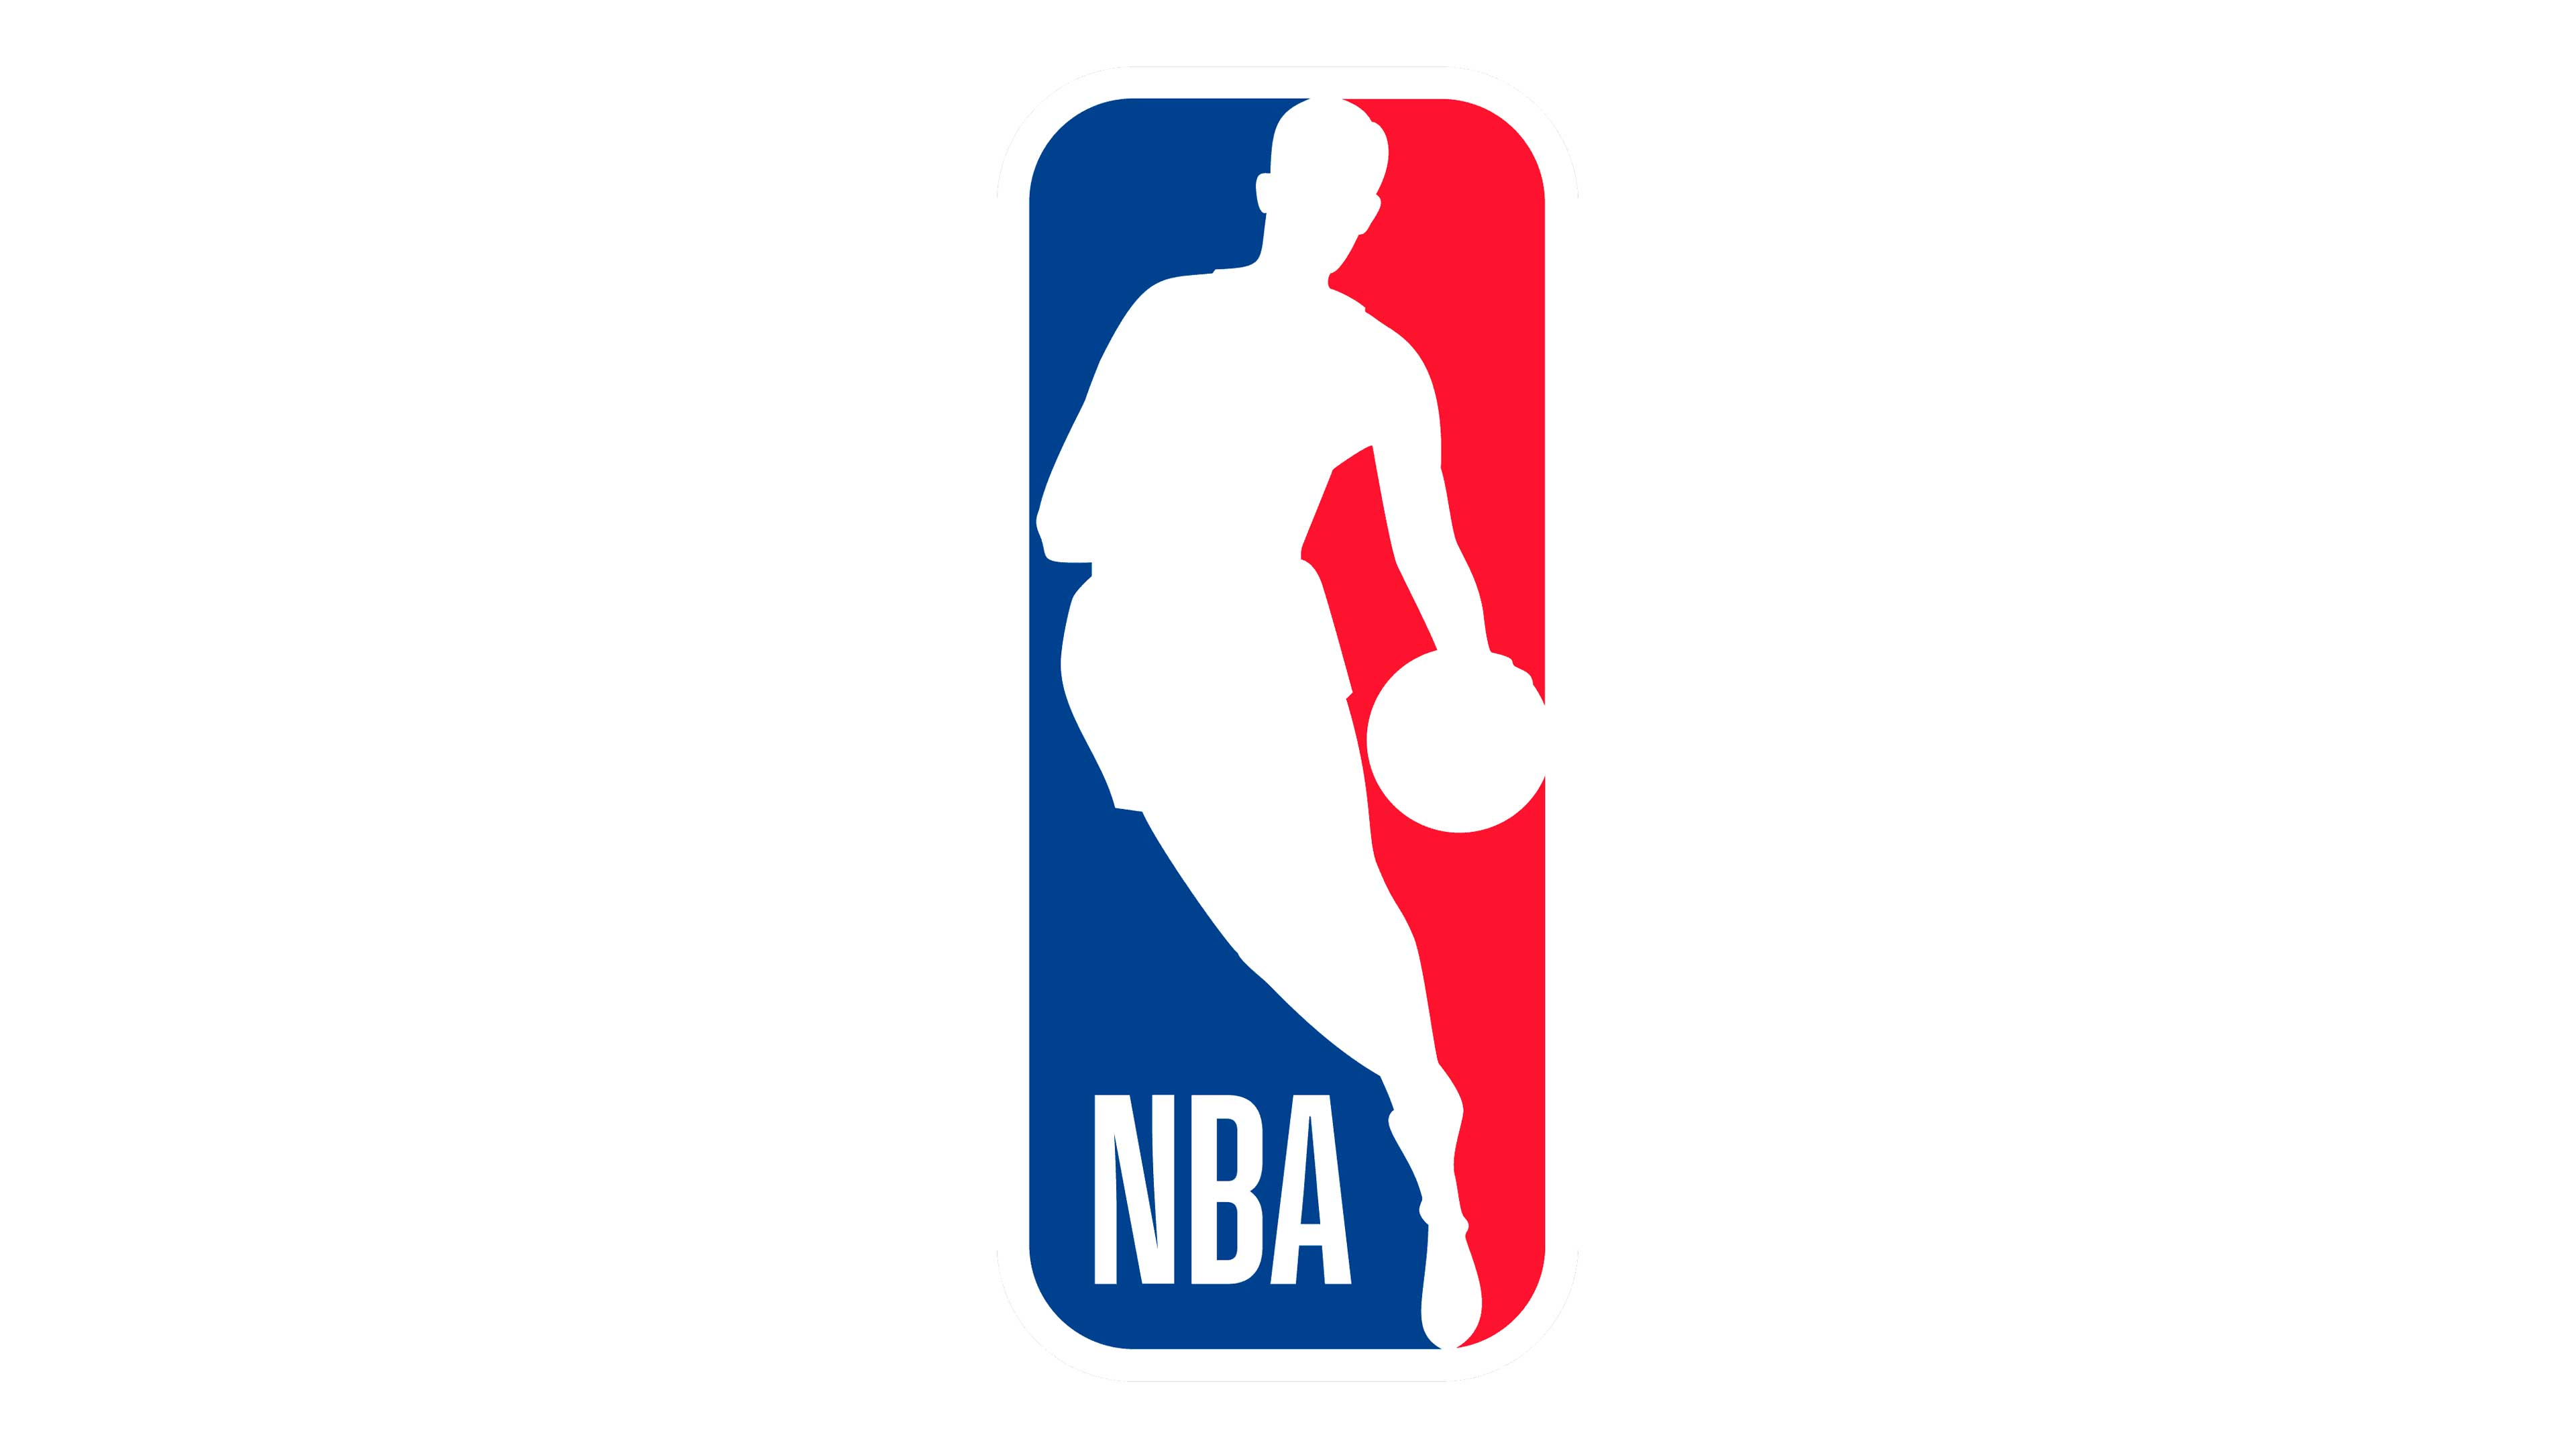

### Introduction

The NBA is known as one of the most innovative professional sports league in the world. For years the league has been ever-evolving introducing new rules and having dynamic athletes. This has allowed the game to be played in a variety of different styles. Personally, I am a major basketball fan and after finding an amazing dataset provided by 
Dominic Samangy on Github (for more information https://github.com/DomSamangy/NBA_Shots_04_23/tree/main), I wanted to dive deeper and do a quick overview analysis on the data.

Although there is a large variety of data to investigate and in the future I plan to look into this dataset further, these are the questions I wanted to answer to start.

- What is the furthest shot made since 2004?
- What is the most Common "Action-Type" per position?
- How have the 3pt shot change over the years?
- How has the total number of shots per game changed?
- Is the average number of shots different per quarter?

### Questions

In [112]:
# Importing necessary libraries 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from datascience import *
from scipy.stats import ttest_ind

# Importing the csv file
df = pd.read_csv('NBA_2004_2023_Shots.csv')

# Print head of data to see the dataframe
df.head(5)

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,10-19-2022,22200004,...,Left Corner 3,Left Side,L,24+ ft.,23.4,12.95,24,1,11,20
1,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,...,Above the Break 3,Center,C,24+ ft.,-0.4,31.45,26,1,10,52
2,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,10-19-2022,22200004,...,Restricted Area,Center,C,Less Than 8 ft.,-1.3,5.25,1,1,10,39
3,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,...,Restricted Area,Center,C,Less Than 8 ft.,-0.1,7.25,2,1,10,31
4,2023,2022-23,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,10-19-2022,22200004,...,Restricted Area,Center,C,Less Than 8 ft.,1.8,7.15,2,1,10,5


##### 1) Furthest Shot

Eventhough, coding-wise this question is the most simple, I wanted to start off with this question for one, my own interest, and secondly because I wanted double check to make sure the data was accurate. This small test did prove the dataset's accuracy as the two furthest shots on an NBA court since 2004 was LeBron James against my favorite team the Boston Celtics from 82 ft away from the basket and Vince Carter in 2016 from 82ft (two absolutely ridiculous shots).

In [4]:
# Create a df of only made shots
made_shots = df[df['SHOT_MADE'] == True]

# Sort by the shot_distance
made_shots.sort_values(by='SHOT_DISTANCE', ascending=False).iloc[:, [1, 3, 5, 14, 17, 19, 20, 21, 22]].head(5)

,SEASON_2,TEAM_NAME,PLAYER_NAME,ACTION_TYPE,ZONE_NAME,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE
1524910,2015-16,Memphis Grizzlies,Vince Carter,Jump Shot,Back Court,Back Court Shot,-0.2,88.15,82
3355747,2006-07,Cleveland Cavaliers,LeBron James,Jump Shot,Back Court,Back Court Shot,-17.9,86.25,82
113065,2022-23,Memphis Grizzlies,Ziaire Williams,Jump Bank Shot,Back Court,Back Court Shot,1.5,84.25,79
3614923,2005-06,New Jersey Nets,Zoran Planinic,Jump Shot,Back Court,Back Court Shot,14.1,80.55,76
3453554,2005-06,Denver Nuggets,Andre Miller,Jump Shot,Back Court,Back Court Shot,-21.7,75.55,73


Also here is a quick visual (although not great) just to see how abnormal these shots really are. The two shots are in red.

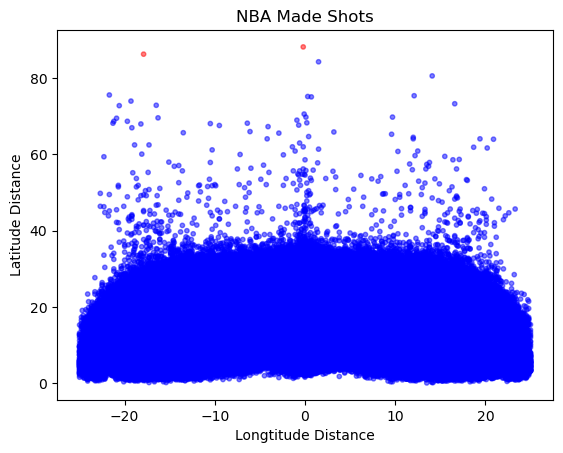

In [6]:
# Create a scatterplot to visualize the distance from the basket

# Create a scatter plot
plt.scatter(made_shots.LOC_X, made_shots.LOC_Y, s = 10, alpha =.5, c=['red' if y > 86 else 'blue' for y in made_shots.LOC_Y])

# Optional: Add labels and title
plt.xlabel('Longtitude Distance')
plt.ylabel('Latitude Distance')
plt.title('NBA Made Shots')

# Show the plot
plt.show()

##### 2) Most Common "Action-Type" Per Position

While looking over the variables in this data, I found the categorical variable "Action-Type" extremely interesting. I wanted to try and look into this variable more, so I decided to see if these actions varied across positions and what was the most common action.

In [140]:
# Create a new grouped df for positions 
positions_grouped = df.groupby('POSITION')['ACTION_TYPE'].value_counts().unstack(fill_value=0)
main_5_positions = positions_grouped.loc[['PG', 'SG', 'SF', 'PF', 'C']]
main_5_positions

ACTION_TYPE,Alley Oop Dunk Shot,Alley Oop Layup shot,Cutting Dunk Shot,Cutting Finger Roll Layup Shot,Cutting Layup Shot,Driving Bank Hook Shot,Driving Bank shot,Driving Dunk Shot,Driving Finger Roll Layup Shot,Driving Finger Roll Shot,...,Tip Dunk Shot,Tip Layup Shot,Tip Shot,Turnaround Bank Hook Shot,Turnaround Bank shot,Turnaround Fadeaway Bank Jump Shot,Turnaround Fadeaway shot,Turnaround Finger Roll Shot,Turnaround Hook Shot,Turnaround Jump Shot
POSITION,,,,,,,,,,,,,,,,,,,,,
PG,472,662,617,606,4153,280,1094,2427,14385,862,...,144,1917,1367,55,309,532,3460,6,750,6176
SG,2004,1747,1778,736,6552,281,859,5439,10991,893,...,265,2904,3616,42,428,451,4866,15,762,10678
SF,3837,2258,3128,625,6369,194,625,6397,6172,512,...,542,4024,6371,78,502,437,5187,15,1445,11909
PF,6003,3316,5400,927,7955,352,511,6133,4859,384,...,1083,8607,15107,564,1053,776,7710,37,7117,20027
C,13948,6073,10137,1430,11983,393,223,4560,2164,144,...,2404,16499,19315,887,1012,571,5364,10,15067,18008


In [141]:
# Lets reshape this data so it's easier to look at
main_5_positions = main_5_positions.reset_index()
reshaped = main_5_positions.melt(id_vars='POSITION', var_name='ACTION_TYPE', value_name='COUNT')
reshaped

,POSITION,ACTION_TYPE,COUNT
0,PG,Alley Oop Dunk Shot,472
1,SG,Alley Oop Dunk Shot,2004
2,SF,Alley Oop Dunk Shot,3837
3,PF,Alley Oop Dunk Shot,6003
4,C,Alley Oop Dunk Shot,13948
...,...,...,...
345,PG,Turnaround Jump Shot,6176
346,SG,Turnaround Jump Shot,10678
347,SF,Turnaround Jump Shot,11909
348,PF,Turnaround Jump Shot,20027


In [142]:
# Creating a new df of the top 10 shots for each position
# This is so I don't have an overwhelming amount of shots in my pie graph
top_10_pg_shots = reshaped[reshaped['POSITION'] == 'PG'].sort_values('COUNT', ascending = False).head(10)
top_10_sg_shots = reshaped[reshaped['POSITION'] == 'SG'].sort_values('COUNT', ascending = False).head(10)
top_10_sf_shots = reshaped[reshaped['POSITION'] == 'SF'].sort_values('COUNT', ascending = False).head(10)
top_10_pf_shots = reshaped[reshaped['POSITION'] == 'PF'].sort_values('COUNT', ascending = False).head(10)
top_10_c_shots = reshaped[reshaped['POSITION'] == 'C'].sort_values('COUNT', ascending = False).head(10)

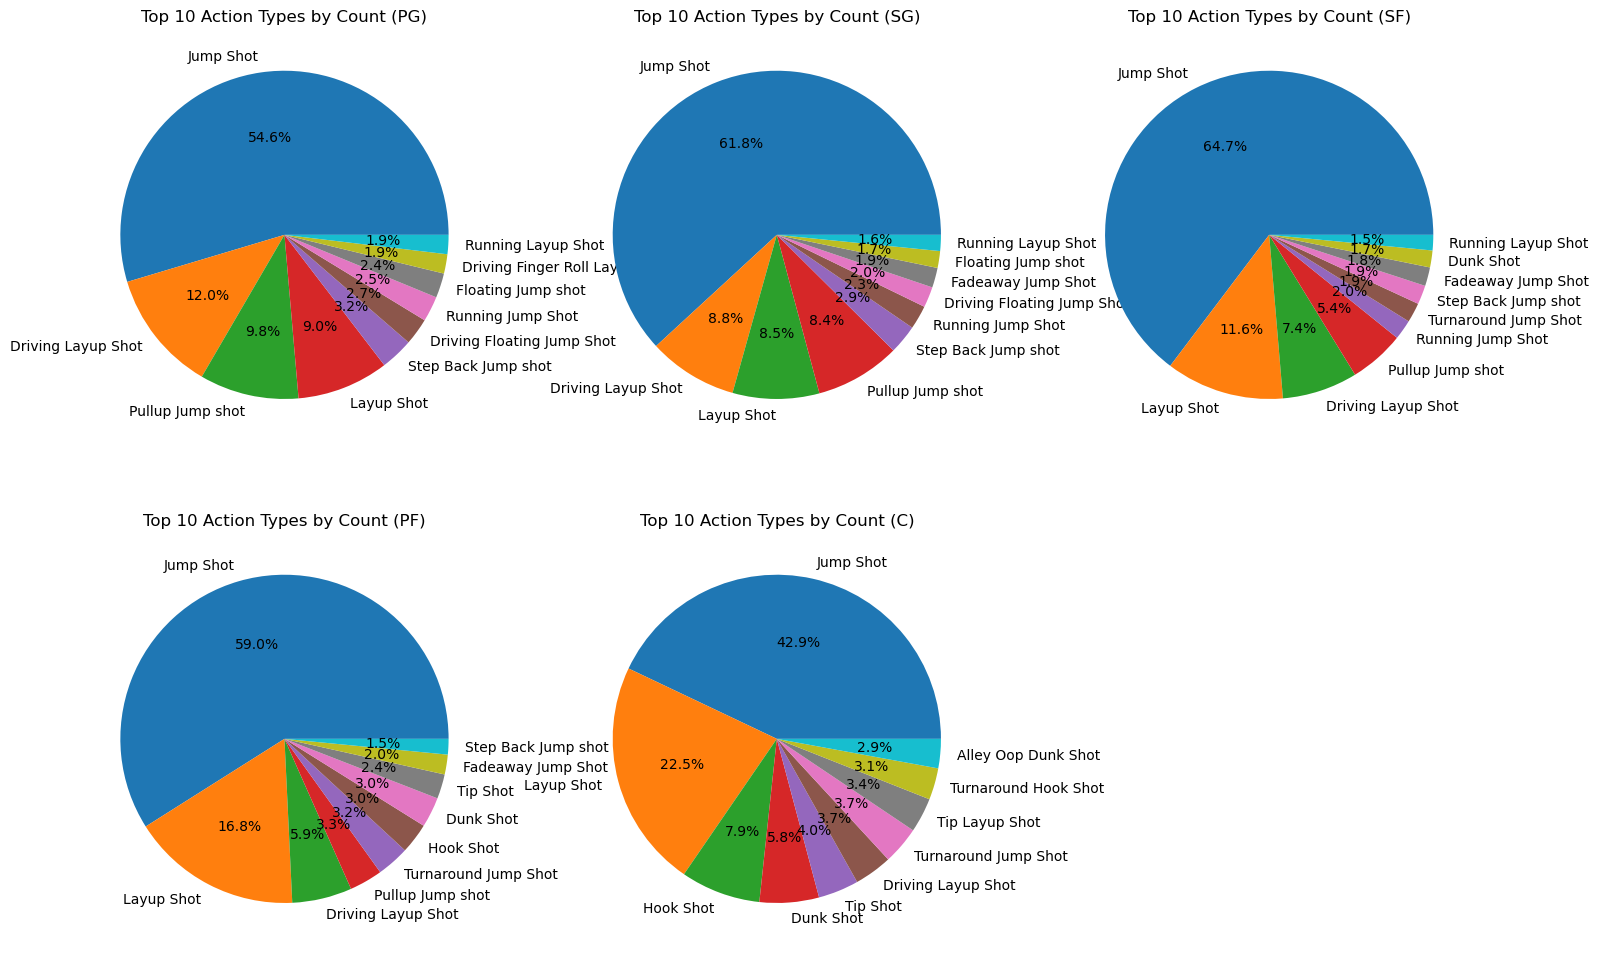

<Figure size 640x480 with 0 Axes>

In [143]:
# Set the figure size
plt.figure(figsize=(18, 12))

# Plot the five position pie plots
plt.subplot(2,3,1)
plt.pie(top_10_pg_shots["COUNT"], labels=top_10_pg_shots["ACTION_TYPE"], autopct="%1.1f%%")
plt.title("Top 10 Action Types by Count (PG)")

plt.subplot(2,3,2)
plt.pie(top_10_sg_shots["COUNT"], labels=top_10_sg_shots["ACTION_TYPE"], autopct="%1.1f%%")
plt.title("Top 10 Action Types by Count (SG)")

plt.subplot(2,3,3)
plt.pie(top_10_sf_shots["COUNT"], labels=top_10_sf_shots["ACTION_TYPE"], autopct="%1.1f%%")
plt.title("Top 10 Action Types by Count (SF)")

plt.subplot(2,3,4)
plt.pie(top_10_pf_shots["COUNT"], labels=top_10_pf_shots["ACTION_TYPE"], autopct="%1.1f%%")
plt.title("Top 10 Action Types by Count (PF)")

plt.subplot(2,3,5)
plt.pie(top_10_c_shots["COUNT"], labels=top_10_c_shots["ACTION_TYPE"], autopct="%1.1f%%")
plt.title("Top 10 Action Types by Count (C)")


plt.show()
plt.clf()

##### 3) 3pt Shot Over Time

Allegedly, in the recent years the game has become more 3pt oriented. I wanted to check this and create a visualization to see the relationship with the 3pt shot over time.

In [144]:
# Creating an only threes df
only_threes = df[df['SHOT_TYPE'] == '3PT Field Goal']

# Creating a make and miss to use later
only_threes_make = only_threes[only_threes['SHOT_MADE'] == True]
only_threes_miss = only_threes[only_threes['SHOT_MADE'] == False] 

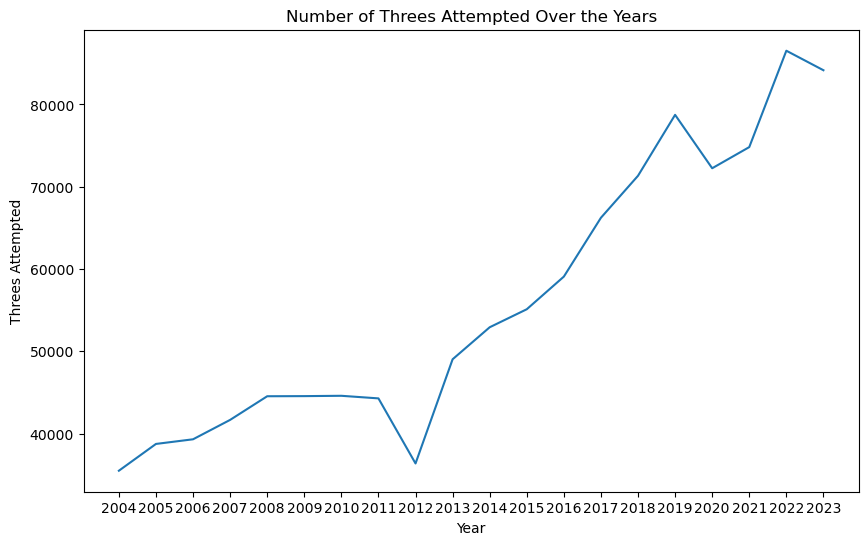

<Figure size 640x480 with 0 Axes>

In [145]:
# For each year calculate the number of threes attempted
years = []
threes_attempted = []

for i in range(2004, 2024):
    years.append(i)
    threes_attempted.append(len(only_threes[only_threes['SEASON_1'] == i]))
    

# Make a time plot of year vs threes attempted
plt.figure(figsize=(10, 6))
plt.plot(years, threes_attempted)
plt.title('Number of Threes Attempted Over the Years')
plt.xlabel('Year')
plt.ylabel('Threes Attempted')
plt.xticks(years)

plt.show()
plt.clf()

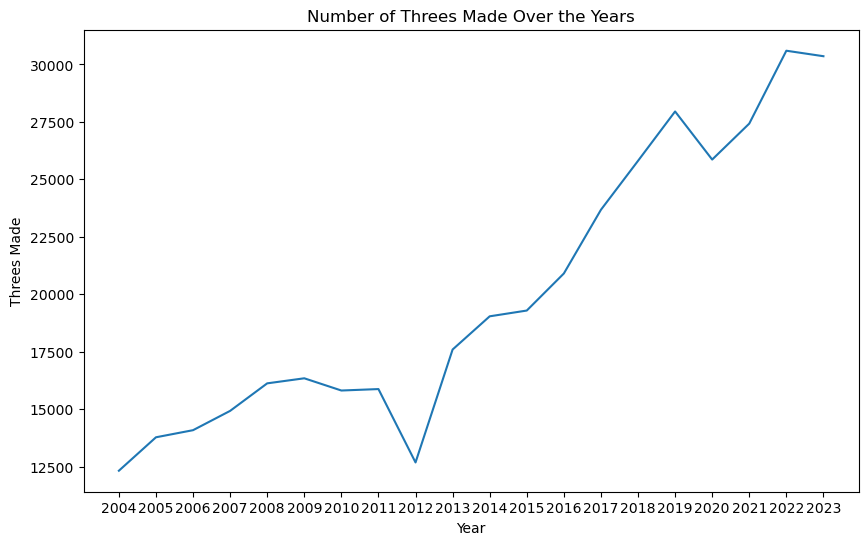

<Figure size 640x480 with 0 Axes>

In [146]:
# For each year calculate the number of threes made
years_2 = []
threes_made = []

for i in range(2004, 2024):
    years_2.append(i)
    threes_made.append(len(only_threes_make[only_threes_make['SEASON_1'] == i]))

# Make a time plot of year vs threes attempted
plt.figure(figsize=(10, 6))
plt.plot(years_2, threes_made)
plt.title('Number of Threes Made Over the Years')
plt.xlabel('Year')
plt.ylabel('Threes Made')
plt.xticks(years)

plt.show()
plt.clf()

In [147]:
# Will also need amount of threes missed for next section
threes_missed = []
for i in range(2004, 2024):
    threes_missed.append(len(only_threes_miss[only_threes_miss['SEASON_1'] == i]))

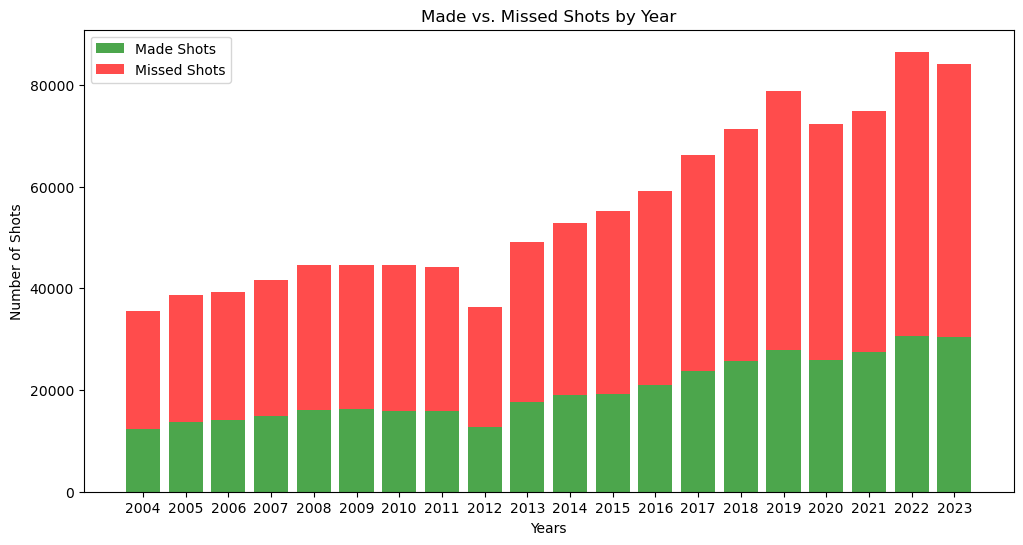

In [148]:
# Make a histogram of years on x and number of threes attempted/made on y
plt.figure(figsize=(12, 6))

# Create bars for made shots
plt.bar(years, threes_made, label='Made Shots', color='green', alpha=0.7)

# Create bars for missed shots, stacked on top of made shots
plt.bar(years, threes_missed, label='Missed Shots', color='red', alpha=0.7, bottom=threes_made)

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Number of Shots')
plt.title('Made vs. Missed Shots by Year')

# Set custom x-tick labels
plt.xticks(years)
plt.legend()

# Show the plot
plt.show()

*Important Note* : 2012 was a lockout year where only 66 games were played by each team. This would explain dips in each graph!

#####  4) Shots Per Game Over Time

Similar to the 3pt shot, we have seen scores skyrocket in recent years. Was this due to poor defense? Better players? More shooting? Personally, I wanted to look at shots per game to visualize the relationship.

In [149]:
# Collect the mean amount of shots per game for each year
means = []

for i in range(2004, 2024):
    year_df = df[df['SEASON_1'] == i]
    game_counts = year_df.groupby('GAME_ID').size().reset_index(name='COUNT')
    year_mean = game_counts['COUNT'].mean()
    means.append((year_mean))
    
means

[159.63246425567704,
 160.67154471544714,
 157.97886178861788,
 159.4081300813008,
 163.0089430894309,
 161.8130081300813,
 163.3869918699187,
 162.40731707317073,
 162.83333333333334,
 164.01871440195282,
 165.95609756097562,
 167.1138211382114,
 169.01869918699188,
 170.6739837398374,
 172.11951219512196,
 178.4211382113821,
 177.63550519357884,
 177.49349442379182,
 176.19674796747967,
 176.60162601626016]

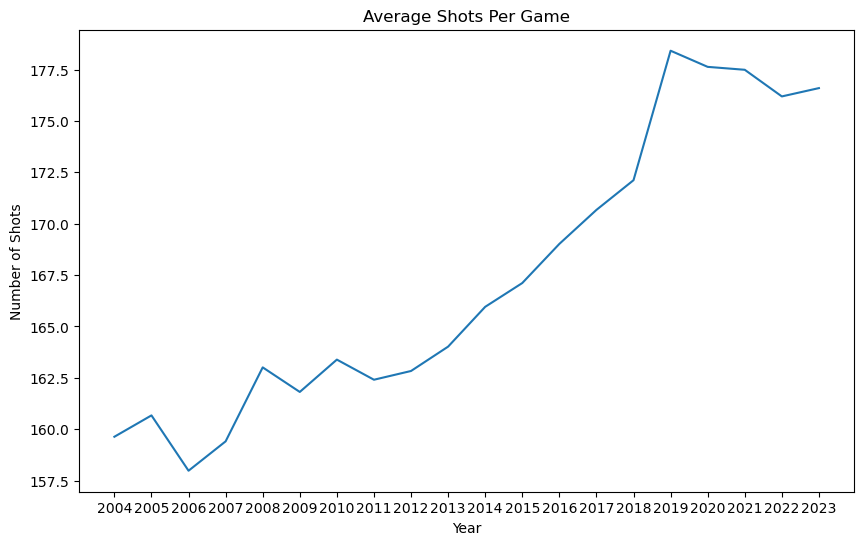

<Figure size 640x480 with 0 Axes>

In [150]:
# Make a time plot of year vs mean shots attempted
plt.figure(figsize=(10, 6))
plt.plot(years, means)
plt.title('Average Shots Per Game')
plt.xlabel('Year')
plt.ylabel('Number of Shots')
plt.xticks(years)

plt.show()
plt.clf()

##### 5) Number of Shots Per Quarter (2023)

This question peaked my interest, because although each quarter is tweleve minutes long, there have been many instances where I felt the game was slowing down. So I wanted to see if there was any trend.

In [151]:
games_2023 = df[df['SEASON_1'] == 2023]

In [152]:
# Collect the mean shots per quarter for 2023
quarters = [1, 2, 3, 4]
quarter_means = []

for i in quarters:
    each_quarter_df = games_2023[games_2023['QUARTER'] == i]
    quarter_shot_counts = each_quarter_df.groupby('GAME_ID').size().reset_index(name='COUNT')
    quarter_mean = quarter_shot_counts['COUNT'].mean()
    quarter_means.append((i, quarter_mean))
    
quarter_means

[(1, 45.74878048780488),
 (2, 44.57073170731707),
 (3, 43.58455284552846),
 (4, 41.50243902439024)]

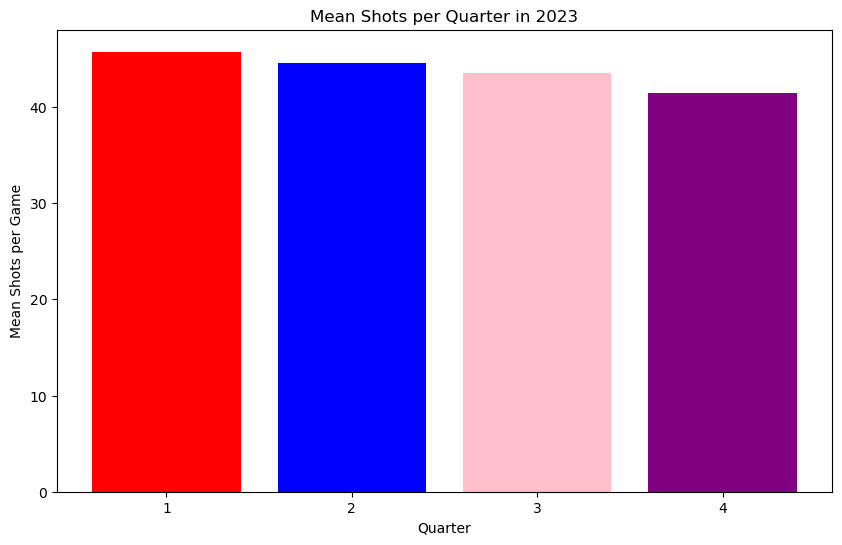

<Figure size 640x480 with 0 Axes>

In [153]:
# Extracting the means and quarters for plotting
quarter_numbers, mean_values = zip(*quarter_means)

plt.figure(figsize=(10, 6)) 
plt.bar(quarter_numbers, mean_values, color = ['red', 'blue', 'pink', 'purple'])
plt.xlabel('Quarter')
plt.ylabel('Mean Shots per Game')
plt.title('Mean Shots per Quarter in 2023')
plt.xticks(quarters)

plt.show()
plt.clf()

### Conclusion

My thoughts for each question...

1) As I Initially stated, I wanted to start off with this question for one, my own interest, and secondly because I wanted double check to make sure the data was accurate. I think my biggest takeaway from this question was that of course it was Lebron James who held the longest shot.

2) Now we can actually start to analyze data and the first thing that stood out to me in the pie graphs was all the most common shots for every position was still a regular jump shot. This surprised me as I expected for bigger positions like centers to have their most common shot be a layup or dunk. Although we can see their layup had the highest percentage, it was still no where close to the jump shot. Also something cool to point out was the 'alley-oop dunk shot' made the center position top 10 shots.

3) Our data did support the idea that the 3pt shot has become more prevelant in recent years. As can be see in both the '3pt shot attempted' and '3pt shots made' graphs there is a gradually increase over time. Also, although I listed it at the bottom of the section, I did want to reiterate the idea that we likely see a decrease in all our visualizations for the year 2012, because this is the lockout season where each team only played 66 games instead of 82. 

4) It was really interesting to see that although there has been a gradual increase in the amount of shots per game, since 2019 there has been a slight decline. This is something that really intrigues me and I would like to investigate this change further in the future. 

5) Unsurprisingly, for the most part, the amount of shots per quarter is relatively similar. It is interesting to note that each quarter the number of shots gradually decline. I would think this could be due to players getting tired meaning they have to use more time to get a shot off or maybe due to the fact a team takes control of the pace of a game over the course of the game, but these are not hypothesis I can confirm until I look into it further.

I enjoyed investigating this dataset and finding out more about a sport that I love. As I mentioned in the beginning, I used this dataset by Dominic Samangy and it was incredibly easy to use. In the future, I would love to dive further into the X_LOC and Y_LOC variables and create some more visually appealing basketball court visuations.

### Practicing Bootstrapping

It has been approximately one month since I last engaged with this Notebook. I have returned to this project with the specific goal of reacquainting myself with essential data analysis techniques, particularly Bootstrapping, which I haven't actively practiced for some time (especially on python). My motivation behind revisiting this dataset is firstly, to reaffirm my proficiency and secondly, to explore two novel and pertinent ideas for testing.

#### Bootstrapping: Player Performance Before and After an Injury

The goal of this will be to determine if the injury had a statistically significant impact on their performance. If you provide a date of an injury and the players name an output will be provided.

In [52]:
def player_performance_analysis(player_name, injury_date):
    # Define a time window
    one_year = pd.DateOffset(years=1)
    injury_date = pd.to_datetime(injury_date)

    start_date_before = injury_date - one_year
    end_date_after = injury_date + one_year
    
    
    # Filter data for the specified player and within the time window
    player_data_before = df[(df['PLAYER_NAME'] == player_name) & (pd.to_datetime(df['GAME_DATE']) >= start_date_before) & (pd.to_datetime(df['GAME_DATE']) < injury_date)]
    player_data_after = df[(df['PLAYER_NAME'] == player_name) & (pd.to_datetime(df['GAME_DATE']) > injury_date) & (pd.to_datetime(df['GAME_DATE']) <= end_date_after)]

    
    # Calculate 'FG_PERCENTAGE' for each game
    before_grouped = player_data_before.groupby('GAME_DATE')
    after_grouped = player_data_after.groupby('GAME_DATE')
    fg_before_grouped = before_grouped['SHOT_MADE'].sum() / before_grouped['EVENT_TYPE'].count()
    fg_after_grouped = after_grouped['SHOT_MADE'].sum() / after_grouped['EVENT_TYPE'].count()
    
    
    # BEGIN BOOTSTRAPPING
    bootstrap_samples_means_before = []
    
    for i in np.arange(1000):
        # Generate bootstrap samples for 'FG_PERCENTAGE' before injury
        bootstrap_sample_mean_before = np.mean(np.random.choice(fg_before_grouped, size=len(fg_before_grouped), replace=True))
        bootstrap_samples_means_before = np.append(bootstrap_samples_means_before, bootstrap_sample_mean_before)
    
    # Determine the bounds for the middle 95% of bootstrap sample mean
    left = percentile(2.5, bootstrap_samples_means_before)
    right = percentile(97.5, bootstrap_samples_means_before)
    
    
    # Plot histogram of bootstrap samples and compare to the mean of fg_after_grouped
    hist = Table().with_column('Bootstrap Sample Means', bootstrap_samples_means_before).hist()
    
    # Add gold line to see bounds
    plt.plot([left, right], [0,0], color = 'gold', lw = 10, zorder = 1)
    # Add a line for the mean fg amounts within a year post-injury
    plt.plot([np.mean(fg_after_grouped), np.mean(fg_after_grouped)], [0, 2.5], color = 'red', lw = 3, zorder = 1)
    # Add Title
    plt.title('Bootstrap Sample Means (Before Injury)')
    plt.show()
    
    return hist

###### Examples Using the Function Above

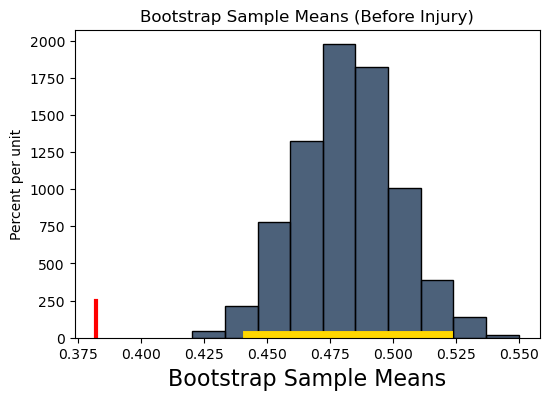

In [57]:
# Brandon Roy
# On April 11, 2010, Roy injured his right knee. Images confirmed a right knee bone contusion and on April 12, 
# further examination of the MRI showed a slight meniscus tear. Roy underwent surgery and was never the same player.

player_performance_analysis("Brandon Roy", '04-11-2010')

# We see statistical significance

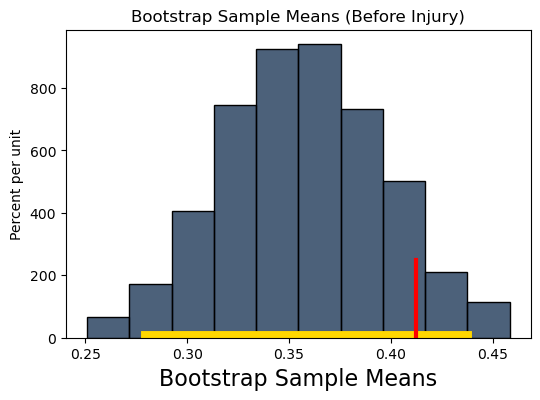

In [59]:
# Paul George
# A grusome injury that many thought George would never be able to recover from, after suffering an open fracture of 
# both his tibia and fibula, George made a miraculous recovery
# ** Note ** I had to do the date one year after injury as he had only six games played within the year post injury

player_performance_analysis('Paul George', '08-01-2015')

# We don't see statistical significance

It's essential to acknowledge that while I've explored how a player's field goal percentage per game was influenced, this analysis is only a part of the broader narrative. I selected this statistic because it can offer insights into both a player's shot volume (how many shots they take per game) and their efficiency. However, it's crucial to recognize that relying solely on this single metric cannot provide a comprehensive understanding of the complete impact on a player's performance following an injury.

In light of the insights gained from this Bootstrap Sample analysis, I would make adjustments in future studies. Instead of relying on a simple year-before-and-after approach when assessing player performance following an injury, a more precise methodology should be used. Specifically, it is recommended to examine the performance of athletes over their 82 games immediately preceding the injury and the initial 82 games post-injury. This revised approach offers significant advantages as it effectively addresses the inherent variability in injury recovery times, as some injuries may necessitate longer rehabilitation periods than others. By focusing on a fixed number of games, we mitigate the risk of dealing with limited sample sizes, which can introduce bias and distort the data.